In [1]:
import time, sys, joblib

import pandas as pd

sys.path.append('/home/yilingh/SI-Interaction')
from selectinf.Simulation.plotting_helpers import *
from selectinf.Simulation.H1.nonlinear_H1_helpers import *

In [71]:
##%%
from operator import le, ge
# Filter p-values according to target sizes (approx. null v.s. signal)
def filter_pval_dict(pval_dict, target_dict, threshold=0.05, operator=le):
    target_dict_df = pd.DataFrame(target_dict)
    filtered_dict = {}
    for par in pval_dict.keys():
        filtered_dict[par] = {}
        par_dict = pval_dict[par]
        target_df_par = target_dict_df[target_dict_df['parameter'] == par]
        
        for method in par_dict.keys():
            targets_p_m = (target_df_par[target_df_par['method'] == method])['target']
            selected_targets = operator(np.abs(targets_p_m), threshold)
            pvals_p_m = np.array(pval_dict[par][method])
            filtered_dict[par][method] = pvals_p_m[selected_targets].tolist()
    
    return filtered_dict

def calculate_thresholded_power(pvalue, targets, level, threshold=0.05,
                                operator=ge):
    pvalue = np.array(pvalue)
    targets = np.array(targets)
    non_null = operator(np.abs(targets), threshold)
    rejection = pvalue < level
    if np.sum(non_null) == 0:
        return 0
    else:
        true_rej = np.sum(non_null * rejection) / np.sum(non_null)

    return true_rej

# Vary Main with Weak Hierarchy

In [87]:
dir_list_wh1_5 = ['results0_40_wh1.5.pkl']
"""dir_list_wh1_5 = ['results0_80_wh1.5.pkl', 'results80_160_wh1.5.pkl',
               'results160_240_wh1.5.pkl', 'results240_320_wh1.5.pkl',
               'results320_400_wh1.5.pkl', 'results400_480_wh1.5.pkl',
               'results480_560_wh1.5.pkl', 'results560_640_wh1.5.pkl'
               ]"""
#dir_list_wh = ['results0_40_wh.pkl']
#dir_list_wh = ['results0_20_wh1.5.pkl']

"dir_list_wh1_5 = ['results0_80_wh1.5.pkl', 'results80_160_wh1.5.pkl',\n               'results160_240_wh1.5.pkl', 'results240_320_wh1.5.pkl',\n               'results320_400_wh1.5.pkl', 'results400_480_wh1.5.pkl',\n               'results480_560_wh1.5.pkl', 'results560_640_wh1.5.pkl'\n               ]"

In [88]:
opers1_5 = []
pvals1_5 = []
targets1_5 = []
for path in dir_list_wh1_5:
    result = joblib.load(path)
    list_of_oper = [tup[0] for tup in result]
    list_of_pval = [tup[1] for tup in result]
    list_of_targets = [tup[2] for tup in result]
    opers1_5.append(combine_lists(list_of_oper))
    pvals1_5.append(combine_nested_lists(list_of_pval))
    targets1_5.append(combine_lists(list_of_targets))

In [89]:
oper_char1_5 = combine_lists(opers1_5)

In [90]:
pvals_all1_5 = combine_nested_lists(pvals1_5)

In [91]:
targets_all1_5 = combine_lists(targets1_5)

In [92]:
pd.DataFrame(targets_all1_5)

,parameter,target,target id,method,index,pivot,pval
0,2,1.610868,"(0, 1)",Naive,0,0.317573,0.364487
1,2,0.548684,"(0, 2)",Naive,0,0.553286,0.557218
2,2,1.473082,"(0, 3)",Naive,0,0.141348,0.000739
3,2,1.827297,"(0, 4)",Naive,0,0.160436,0.000003
4,2,1.932372,"(0, 5)",Naive,0,0.074859,0.000007
...,...,...,...,...,...,...,...
18718,1,0.408189,"(14, 17)",MLE,39,0.532627,0.343158
18719,1,0.167831,"(15, 17)",MLE,39,0.375288,0.986033
18720,1,0.209996,"(16, 17)",MLE,39,0.321359,0.947631
18721,1,0.378755,"(17, 18)",MLE,39,0.261839,0.942289


In [93]:
## Plotting dict: SNR - Method - List of pvals
filtered_dict = filter_pval_dict(pvals_all1_5, targets_all1_5, threshold = 0.1,
                                 operator=le)

In [94]:
filtered_dict

{2: {'Naive': [0.5983864772725261,
   0.6906348708374546,
   0.6620582891356612,
   0.4658360533451942,
   0.7890567448708574,
   0.1887666167807449,
   0.8550377769466398,
   0.11538858087329643,
   0.08093721837497417],
  'Data Splitting': [0.667005732206869,
   0.8454762566479685,
   0.8774952830216345,
   0.27383183186716564,
   0.903857765030059,
   0.9907724897695275,
   0.6688540457074348,
   0.3005237385599707,
   0.315697415214906,
   0.3614824981770337,
   0.3724594911065018,
   0.2098969908006273,
   0.7272754229054836,
   0.4787075642301477,
   0.14464394410302742,
   0.6763393701295006,
   0.008319968516009947,
   0.7041368618410928,
   0.6363367305214058,
   0.9933554177395001,
   0.036150766820376226,
   0.47162259730086176,
   0.002247987567694497,
   0.05996597243561353,
   0.4674791528920662,
   0.5378587903996049,
   0.899853369951627,
   0.04336499719144054,
   0.723893744909184,
   0.6803566873736726,
   0.010280173725100364,
   0.759679241676921,
   0.028902631848

In [95]:
def filter_pval_dict_new(target_dict, threshold=0.05, operator=le):
    grouped_targets = pd.DataFrame(target_dict).groupby(['parameter', 'method'])
    filtered_dict = {}
    # Filter by 
    for name, group in grouped_df:
        # Subset the selected targets
        selected_targets_id = operator(np.abs(group['target']), threshold)
        selected_targets = group['pivot'][selected_targets_id]
        # Then filtered_dict.keys must be a dictionary
        if name[0] in filtered_dict.keys():
            filtered_dict[name[0]][name[1]] = selected_targets.tolist()
        else:
            filtered_dict[name[0]] = {}
            filtered_dict[name[0]][name[1]] = selected_targets.tolist()
        
    return filtered_dict
        

In [97]:
filtered_dict_new = filter_pval_dict_new(targets_all1_5, threshold = 0.5,
                                         operator=le)

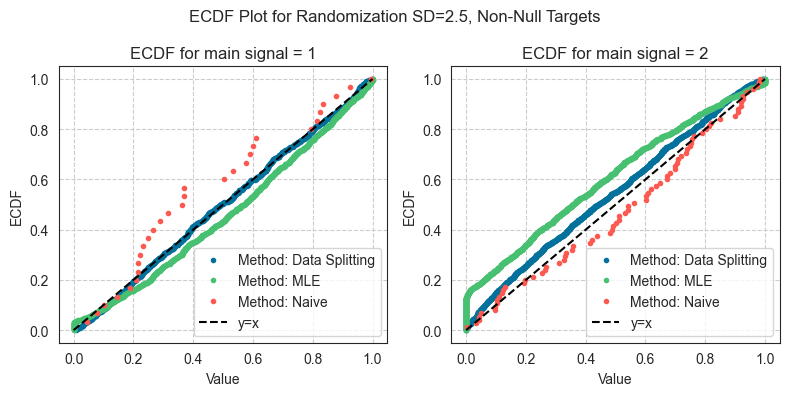

In [98]:
plot_ecdfs(filtered_dict_new, xaxis="main signal",
           title="ECDF Plot for Randomization SD=2.5, Non-Null Targets")

In [99]:
filtered_dict_new

{1: {'Data Splitting': [0.2503915648249676,
   0.0756136223285119,
   0.4137335166854405,
   0.5356729673875041,
   0.23008430465880453,
   0.2926311084288374,
   0.12610195543591474,
   0.18208901425983665,
   0.4039455414736226,
   0.6446834639648392,
   0.6102463856567717,
   0.6874838582217113,
   0.6293987714070901,
   0.5263070448251542,
   0.4524144424898144,
   0.2661548780020808,
   0.24385531344649686,
   0.6488156591489347,
   0.8116937498356221,
   0.8020871792716363,
   0.9296356220426103,
   0.3479990860152415,
   0.6088790144654704,
   0.03988178721874175,
   0.6502221947214191,
   0.5445194120024647,
   0.5929279661075125,
   0.35949169482883125,
   0.3159468900272392,
   0.626513738384762,
   0.6477462206705105,
   0.8457298000061129,
   0.39860569834224513,
   0.3182746070072945,
   0.39723847136273677,
   0.47086084334239964,
   0.29222703355965507,
   0.8197451600786367,
   0.13252190213293902,
   0.33811115027542976,
   0.7174378067896015,
   0.4952512027461791,
  

In [100]:
pd.DataFrame(targets_all1_5)

,parameter,target,target id,method,index,pivot,pval
0,2,1.610868,"(0, 1)",Naive,0,0.317573,0.364487
1,2,0.548684,"(0, 2)",Naive,0,0.553286,0.557218
2,2,1.473082,"(0, 3)",Naive,0,0.141348,0.000739
3,2,1.827297,"(0, 4)",Naive,0,0.160436,0.000003
4,2,1.932372,"(0, 5)",Naive,0,0.074859,0.000007
...,...,...,...,...,...,...,...
18718,1,0.408189,"(14, 17)",MLE,39,0.532627,0.343158
18719,1,0.167831,"(15, 17)",MLE,39,0.375288,0.986033
18720,1,0.209996,"(16, 17)",MLE,39,0.321359,0.947631
18721,1,0.378755,"(17, 18)",MLE,39,0.261839,0.942289


In [101]:
# List and array representations of true interaction indices
active_inter_list_true = np.array([[0, 1], [1, 2], [2, 4], [1, 5], [2, 6]])
active_inter_list_true_list = [(x[0], x[1]) for x in active_inter_list_true]

In [102]:
import ast
def filter_targets(targets_dict, true_inter_list):
    targets = targets_dict['target id']
    true_flag = [ast.literal_eval(t) in true_inter_list for t in targets]
    filtered_dict = {}
    for k in targets_dict.keys():
        filtered_dict[k] = np.array(targets_dict[k])[true_flag].tolist()
        
    return filtered_dict
        

In [103]:
##%%
def filter_targets_dict(target_dict, method='Naive'):
    filtered_dict = {}
    for par in target_dict.keys():
        filtered_dict[par] = (np.array(target_dict[par])[np.array(target_dict['method']) == method]).tolist()
    
    return filtered_dict

In [104]:
filtered_targets1_5 = filter_targets(targets_all1_5, active_inter_list_true_list)

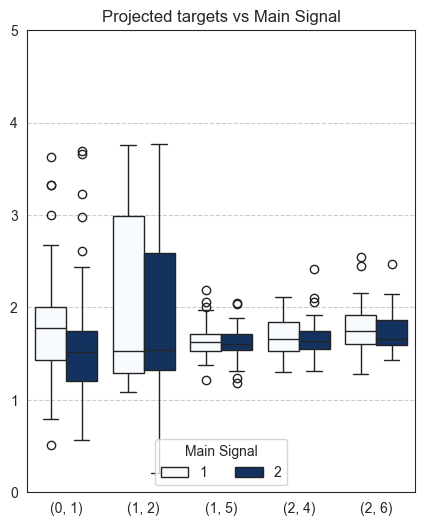

In [105]:
plot_multi_targets(filter_targets_dict(filtered_targets1_5,'MLE'), xaxis="Main Signal",
                   ylim_low=0, ylim_high=5)

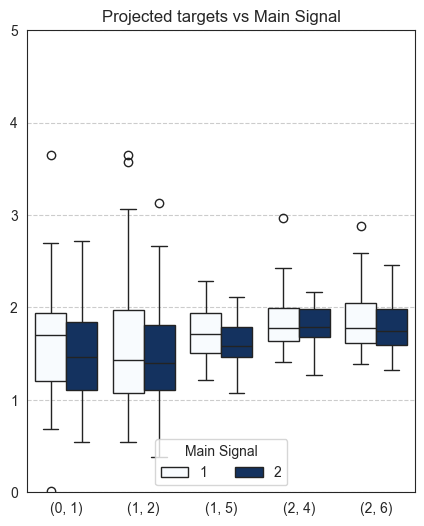

In [106]:
plot_multi_targets(filter_targets_dict(filtered_targets1_5,'Data Splitting'), xaxis="Main Signal",
                   ylim_low=0, ylim_high=5)

# Calculating Thresholded Power

In [107]:
def calculate_thresholded_power_df(targets_dict,
                                threshold=0.1,
                                level=0.1,
                                   operator=ge):
    grouped_targets = pd.DataFrame(targets_dict).groupby(['index',
                                                          'method', 'parameter'])
    power_df = {}
    power_df['parameter'] = []
    power_df['method'] = []
    power_df['thresholded power'] = []
    for name, group in grouped_targets:
        power_df['parameter'].append(name[2])
        power_df['method'].append(name[1])
        pvalues = group['pval']
        targets = group['target']
        power_df['thresholded power'].append(
            calculate_thresholded_power(pvalues, targets, level=level, 
                                        threshold=threshold, operator=operator))
    return power_df

In [108]:
def point_plot_power(oper_char_dfs, x_axis='p', hue='method', 
                     ylim_low=None, ylim_high=None):
    for i in range(len(oper_char_dfs)):
        oper_char_dfs[i] = oper_char_dfs[i].copy()
    sns.set_style("white", {'axes.facecolor': 'white',
                            'axes.grid': True,
                            'axes.linewidth': 2.0,
                            'grid.linestyle': u'--',
                            'grid.linewidth': 4.0,
                            'xtick.major.size': 5.0,
                            })
    # sns.histplot(oper_char_df["sparsity size"])
    # plt.show()
    n_subplots = len(oper_char_dfs)
    # cols = int(np.ceil(n_subplots / 2))
    cols = n_subplots

    fig = plt.figure(figsize=(cols * 5, 6))

    my_palette = {"MLE": "#48c072",
                  "Naive": "#fc5a50",
                  "Data Splitting": "#03719c"}

    # Create each subplot
    for i in range(1, n_subplots + 1):
        # ax = fig.add_subplot(2, cols, i) #two rows
        ax = fig.add_subplot(1, cols, i)  # one row
        if hue is not None:
            sns.pointplot(x=oper_char_dfs[i-1][x_axis],
                          y=oper_char_dfs[i-1]['thresholded power'],
                          hue=oper_char_dfs[i-1][hue],
                          markers='o',
                          palette=my_palette,
                          ax=ax)
        else:
            sns.pointplot(x=oper_char_dfs[i-1][x_axis],
                          y=oper_char_dfs[i-1]['thresholded power'],
                          markers='o',
                          palette=my_palette,
                          ax=ax)
        if ylim_low is not None and ylim_high is not None:
            ax.set_ylim([ylim_low, ylim_high])

        ax.legend().set_visible(False)

    handles, labels = ax.get_legend_handles_labels()
    # fig.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.2)

    fig.subplots_adjust(bottom=0.3)
    fig.legend(handles, labels, loc='lower center', ncol=n_subplots,
               prop={'size': 15})

    # cov_plot.legend_.remove()
    # len_plot.legend_.remove()

    # plt.suptitle("Changing n,p")
    plt.subplots_adjust(wspace=0.3, hspace=0.5)
    plt.show()

In [109]:
power_df1_5 = calculate_thresholded_power_df(targets_dict=targets_all1_5,
                                        threshold=0.1, level=0.1,
                                             operator=ge)

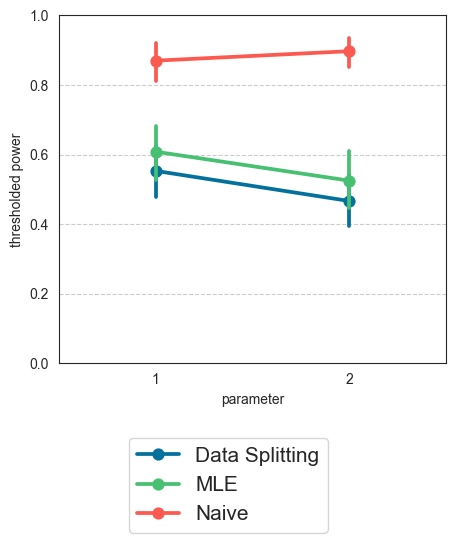

In [110]:
point_plot_power(oper_char_dfs=[pd.DataFrame(power_df1_5)],
                 x_axis="parameter",
                 hue="method", ylim_high=1, ylim_low=0)